# ML Activity 1: Pattern Recognition Preliminaries
### Determine important features of bananas, mangoes, and oranges. Apply clustering algorithms to see if there's a pattern in the acquired features

In [32]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

In [33]:
data_mango = pd.read_excel('new_features.xlsx', sheet_name='Class 1 - Mango')
data_orange = pd.read_excel('new_features.xlsx', sheet_name='Class 2 - Orange')
data_banana = pd.read_excel('new_features.xlsx', sheet_name='Class 3 - Banana')

frames = [data_mango, data_orange, data_banana]

In [34]:
data_orange

,Image,R,G,B,StDev,Median,AR,Skew,Round
0,1,216.000,64.000,25.000,29.606000,132.000,1.049,0.752,0.953
1,2,241.000,111.000,14.000,28.003000,133.000,1.032,0.523,0.969
2,3,228.000,121.000,21.000,33.213000,138.000,1.012,0.624,0.988
3,4,238.000,145.000,23.000,18.029000,124.000,1.065,1.217,0.939
4,5,252.000,130.000,24.000,27.140000,138.000,1.151,1.099,0.869
5,6,231.000,155.000,26.000,32.892000,132.000,1.008,1.020,0.992
6,7,251.000,95.000,20.000,29.598000,130.000,1.020,1.390,0.969
7,8,250.000,157.000,35.000,15.865000,140.000,1.186,2.026,0.843
8,9,246.000,156.000,29.000,16.942000,141.000,1.102,-0.356,0.907
9,10,239.000,131.000,31.000,26.344000,133.000,1.009,1.320,0.991


### Formula to get hue:
If Red is max, then Hue = (G-B)/(max-min) <br>
If Green is max, then Hue = 2.0 + (B-R)/(max-min) <br>
If Blue is max, then Hue = 4.0 + (R-G)/(max-min) <br>

In [35]:
# Calculate hue from rgb values
def hue(R,G,B):
    
    val = [R, G, B]
    maxi = max(val)
    mini = min(val)
    
    if R == maxi:
        hue = (G-B)/(maxi - mini)
        
    elif G == maxi:
        hue = 2.0 + (B - R)/(maxi-mini)
        
    else:
        hue = 4.0 + (R - G)/(maxi-mini)
    
    return hue * 60

In [36]:
hue(246,225,81)

52.36363636363636

In [37]:
data_mango['Hue'] = data_mango.apply(lambda row: hue(row['R'], row['G'], row['B']), axis=1)

In [38]:
title = ['Mango', 'Orange', 'Banana']
for i in zip(frames,title):
    i[0]['Hue'] = i[0].apply(lambda row: hue(row['R'], row['G'], row['B']), axis=1)
    i[0]['Class'] = i[0].apply(lambda row: i[1] , axis=1)

In [39]:
df = pd.concat(frames, ignore_index=True)

In [40]:
df

,Image,R,G,B,StDev,Median,AR,Skew,Round,Hue,Class
0,1,215.000,210.000,177.000,35.793,183.0,1.688,-0.679,0.593,52.105263,Mango
1,2,248.000,190.000,73.000,14.205,175.0,1.727,-0.416,0.579,40.114286,Mango
2,3,246.000,225.000,81.000,20.652,158.0,1.729,-0.553,0.578,52.363636,Mango
3,4,220.000,155.000,93.000,30.002,110.0,1.446,0.831,0.692,29.291339,Mango
4,5,249.000,209.000,75.000,19.470,171.0,1.553,-0.438,0.644,46.206897,Mango
...,...,...,...,...,...,...,...,...,...,...,...
100,31,136.970,133.650,77.491,27.538,135.0,-0.826,1.553,0.644,56.650919,Banana
101,32,199.253,198.532,191.040,44.942,113.0,-0.449,1.297,0.771,54.732741,Banana
102,33,244.913,235.731,207.753,31.534,165.0,-0.686,2.547,0.393,45.174381,Banana
103,34,240.595,226.424,178.542,33.292,169.0,-1.012,1.463,0.683,46.297842,Banana


In [41]:
df['Normalized Hue'] = df.apply(lambda row: row['Hue']/max(df['Hue']), axis=1)
df.drop(columns=['Image','R', 'G', 'B', 'Hue'], axis=1, inplace=True)
df.head(5)
df.to_excel("perceptron_features.xlsx")

### Selecting best features for correlation using SelectKbest of scikit

The correlation coefficient has values between -1 to 1
 1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation) </br>
 2. A value closer to 1 implies stronger positive correlation </br>
 3. A value closer to -1 implies stronger negative correlation </br>

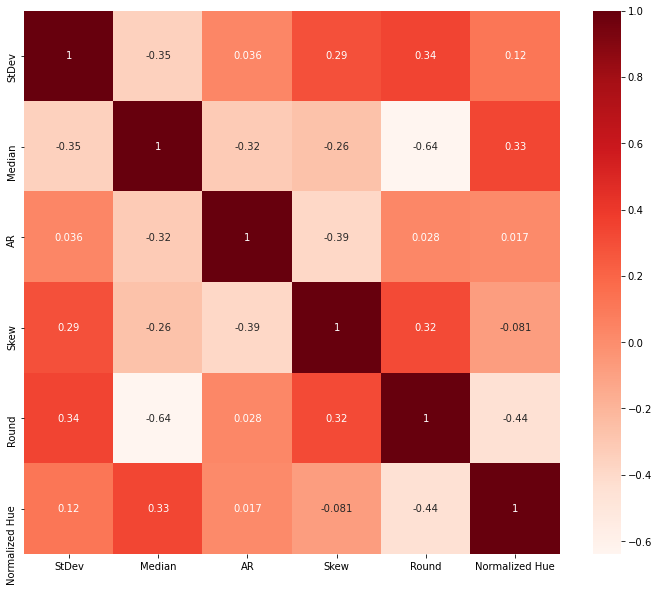

In [42]:
# Firs, we create a dummy integer for the fruit class
#df_corr = df.replace(['Mango', 'Orange', 'Banana'], [0,1,2])

# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('heatmap.png')
plt.show()

In [43]:
#Correlation with output variable
col_df = pd.DataFrame(df)
col_df.drop('Class', axis=1, inplace=True)

In [44]:
for i in col_df.columns:
    cor_target = abs(cor[i]) #Selecting highly correlated features
    relevant_features = cor_target[ (cor_target<1.0) & (cor_target>0.6)]
    print(relevant_features)

Series([], Name: StDev, dtype: float64)
Round    0.640071
Name: Median, dtype: float64
Series([], Name: AR, dtype: float64)
Series([], Name: Skew, dtype: float64)
Median    0.640071
Name: Round, dtype: float64
Series([], Name: Normalized Hue, dtype: float64)


### The following has a strong correlation with each other:
1. Round vs. AR (Corr = 0.949)
2. Round vs. Normalized Hue (Corr = 0.652)
3. Normalized Hue vs. AR (Corr = 0.779)

So we're going to see the clusters through this

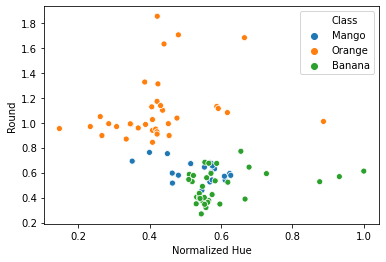

In [45]:
sns.scatterplot(data=df, x='Normalized Hue', y='Round', hue='Class')
plt.savefig('normVSround.png')

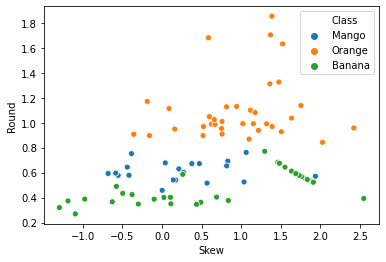

In [46]:
sns.scatterplot(data=df, x='Skew', y='Round', hue='Class')
plt.savefig('skewVSround.png')

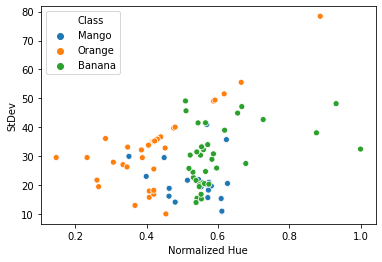

In [47]:
sns.scatterplot(data=df, x='Normalized Hue', y='StDev', hue='Class')
plt.legend(loc='upper left')
plt.savefig('normVSstdev.png')

# ML Activity 2: Perceptron

### Find a decision line across the space to separate classes <br>
I will use the normalized hue and roundess as axes for the perceptron.


In [48]:
# df for perceptron 1 (without Banana)
perceptron1_df = pd.DataFrame(df)

In [49]:
# Get names of indexes for which column Age has value 30
indexNames = perceptron1_df[perceptron1_df['Class'] == 'Banana'].index
# Delete these row indexes from dataFrame
perceptron1_df.drop(indexNames , inplace=True)

In [50]:
indexNames

Int64Index([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
             83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
             96,  97,  98,  99, 100, 101, 102, 103, 104],
           dtype='int64')

In [51]:
perceptron1_df = perceptron1_df.replace(['Mango','Orange'], [1,-1])

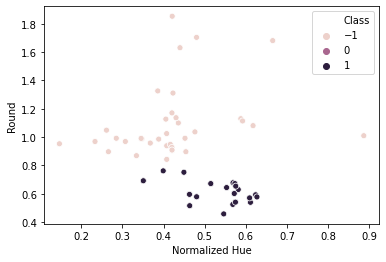

In [52]:
sns.scatterplot(data=perceptron1_df, x='Normalized Hue', y='Round', hue='Class')

### Creating the Perceptron 

In [56]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def z(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.a_ = np.dot(X,self.w_)
        
        self.z_ = []
        for ai in self.a_:
            if ai >= 0:
                z = 1
                self.z_.append(1)
            else:
                self.z_.append(-1)
        
    
            
        

array([0., 0., 0.])

# TRIAL AND ERROOOOOORRRRR 

In [23]:
X = perceptron1_df[['Round', 'Normalized Hue']]
X.insert(0,'Bias',1)
X.shape


(36, 3)

In [24]:
w = np.zeros(X.shape[1])

In [25]:
q = np.dot(X,w)
q.shape

(36,)

In [26]:
eta = 0.01
n_iter = 10

In [35]:
def fit(X):
        w_ = np.zeros(X.shape[1])
        a_ = np.dot(X,w)
        
        z_ = []
        for ai in a_:
            if ai >= 0:
                z_.append(1)
            else:
                z_.append(-1)
                
        
        return z

In [33]:
d = perceptron1_df[['Class']]

In [36]:
fit(X)

NameError: name 'z' is not defined

get the weight changes

In [155]:
w = np.zeros(X.shape[1])
w_delta = eta * (d-z)

0
1
2


In [1]:
z

NameError: name 'z' is not defined